In [1]:
!wget https://download.microsoft.com/download/3/e/1/3e1c3f21-ecdb-4869-8368-6deba77b919f/kagglecatsanddogs_5340.zip

--2025-07-11 12:42:01--  https://download.microsoft.com/download/3/e/1/3e1c3f21-ecdb-4869-8368-6deba77b919f/kagglecatsanddogs_5340.zip
Resolving download.microsoft.com (download.microsoft.com)... 23.222.110.64, 2600:1413:5000:12ae::317f, 2600:1413:5000:12a1::317f
Connecting to download.microsoft.com (download.microsoft.com)|23.222.110.64|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 824887076 (787M) [application/octet-stream]
Saving to: ‘kagglecatsanddogs_5340.zip’

kagglecatsanddogs_5 100%[===================>] 786.67M  77.9MB/s    in 8.1s    

2025-07-11 12:42:09 (97.6 MB/s) - ‘kagglecatsanddogs_5340.zip’ saved [824887076/824887076]



In [2]:
!unzip kagglecatsanddogs_5340.zip

Streaming output truncated to the last 5000 lines.
  inflating: PetImages/Dog/5500.jpg  
  inflating: PetImages/Dog/5501.jpg  
  inflating: PetImages/Dog/5502.jpg  
  inflating: PetImages/Dog/5503.jpg  
  inflating: PetImages/Dog/5504.jpg  
  inflating: PetImages/Dog/5505.jpg  
  inflating: PetImages/Dog/5506.jpg  
  inflating: PetImages/Dog/5507.jpg  
  inflating: PetImages/Dog/5508.jpg  
  inflating: PetImages/Dog/5509.jpg  
  inflating: PetImages/Dog/551.jpg   
  inflating: PetImages/Dog/5510.jpg  
  inflating: PetImages/Dog/5511.jpg  
  inflating: PetImages/Dog/5512.jpg  
  inflating: PetImages/Dog/5513.jpg  
  inflating: PetImages/Dog/5514.jpg  
  inflating: PetImages/Dog/5515.jpg  
  inflating: PetImages/Dog/5516.jpg  
  inflating: PetImages/Dog/5517.jpg  
  inflating: PetImages/Dog/5518.jpg  
  inflating: PetImages/Dog/5519.jpg  
  inflating: PetImages/Dog/552.jpg   
  inflating: PetImages/Dog/5520.jpg  
  inflating: PetImages/Dog/5521.jpg  
  inflating: PetImages/Dog/5522.jpg  

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
from keras.preprocessing.image import load_img
warnings.filterwarnings('ignore')
import os

# Dog 1 Cat 0

In [4]:
input_path=[]
label=[]

for class_name in os.listdir('PetImages'):
  for path in os.listdir('PetImages/'+class_name):
    input_path.append(os.path.join('PetImages',class_name,path))
    if class_name=='Dog':
      label.append(1)
    else:
      label.append(0)
print(input_path[0],label[0])

PetImages/Dog/5449.jpg 1


In [5]:
len(input_path)

25002

In [6]:
df=pd.DataFrame()
df['images']=input_path
df['label']=label
df=df.sample(frac=1).reset_index(drop=True)

In [7]:
df['label']=df['label'].astype('str')

In [8]:
df.head()

,images,label
0,PetImages/Cat/5399.jpg,0
1,PetImages/Dog/10554.jpg,1
2,PetImages/Dog/3109.jpg,1
3,PetImages/Cat/6994.jpg,0
4,PetImages/Dog/7240.jpg,1


In [9]:
for i in df['images']:
  if '.jpg' not in i:
    print(i)


PetImages/Cat/Thumbs.db
PetImages/Dog/Thumbs.db


# EDA

In [10]:
df=df[df['images']!='PetImages/Dog/Thumbs.db']
df=df[df['images']!='PetImages/Cat/Thumbs.db']

In [11]:
import PIL
l=[]
for image in df['images']:
  try:
    img=PIL.Image.open(image)
  except:
    l.append(image)
l

['PetImages/Cat/666.jpg', 'PetImages/Dog/11702.jpg']

In [12]:
df=df[df['images']!='PetImages/Cat/666.jpg']
df=df[df['images']!='PetImages/Dog/11702.jpg']

In [13]:
import random
plt.figure(figsize=(25,25))
temp=df[df['label']==1]['images']
start=random.randint(0,len(temp))
files=temp[start:start+25]
for index,file in enumerate(files):
  plt.subplot(5,5,index+1)
  img=load_img(file)
  img= np.array(img)
  plt.imshow(img)
  plt.title('Dog')
  plt.axis('off')


<Figure size 2500x2500 with 0 Axes>

In [14]:
plt.figure(figsize=(25,25))
temp=df[df['label']==0]['images']
start=random.randint(0,len(temp))
files=temp[start:start+25]
for index,file in enumerate(files):
  plt.subplot(5,5,index+1)
  img=load_img(file)
  np.array(img)
  plt.imshow(img)
  plt.title('Cat')
  plt.axis('off')

<Figure size 2500x2500 with 0 Axes>

<Axes: xlabel='count', ylabel='label'>

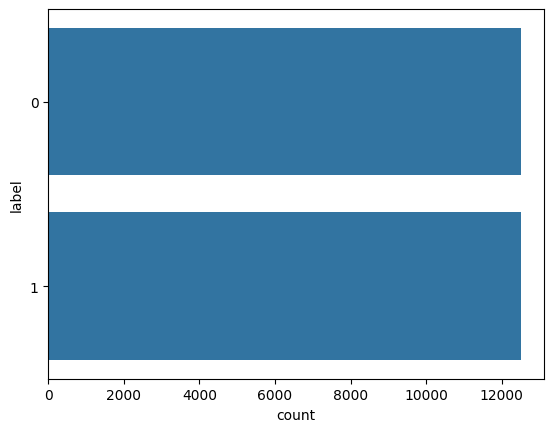

In [15]:
import seaborn as sns
sns.countplot(df['label'])


# Create Data Generator for the Images : Use to avoid crash else everything will load in RAM and crash

## Normalization of images Convert to lower

In [16]:
!pip install tensorflow

In [17]:
from sklearn.model_selection import train_test_split
train,test=train_test_split(df,test_size=0.2,random_state=42)

In [18]:
train.head()

,images,label
23290,PetImages/Dog/1788.jpg,1
17785,PetImages/Dog/8027.jpg,1
1020,PetImages/Cat/8721.jpg,0
12647,PetImages/Dog/8329.jpg,1
1533,PetImages/Dog/10482.jpg,1


In [19]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_generator=ImageDataGenerator(rescale=1./255, #normalize
                                   rotation_range=40,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   fill_mode='nearest')
val_generator=ImageDataGenerator(rescale=1./255)
train_iterator=train_generator.flow_from_dataframe(train
                                                   ,x_col='images',
                                                   y_col='label',
                                                   target_size=(128,128),
                                                   batch_size=512,
                                                   class_mode='binary')
val_iterator=val_generator.flow_from_dataframe(test
                                                   ,x_col='images',
                                                   y_col='label',
                                                   target_size=(128,128),
                                                   batch_size=512,
                                                   class_mode='binary')

Found 19998 validated image filenames belonging to 2 classes.
Found 5000 validated image filenames belonging to 2 classes.


# Model creation

In [20]:
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Flatten,Dense
model=Sequential([      Conv2D(16,(3,3),activation='relu',input_shape=(128,128,3)),
                        MaxPooling2D((2,2)),
                        Conv2D(32,(3,3),activation='relu'),
                        MaxPooling2D((2,2)),
                        Conv2D(64,(3,3),activation='relu'),
                        MaxPooling2D((2,2)),
                        Flatten(),
                        Dense(512,activation='relu'),
                        Dense(1,activation='sigmoid') #Binary classification so using sigmoid
])
# We have built 3 Convolutional layer, followed by flatten layer and two dense layer


In [21]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     6,423,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,447,137 (24.59 MB)

 Trainable params: 6,447,137 (24.59 MB)

 Non-trainable params: 0 (0.00 B)

In [22]:
history=model.fit(train_iterator,epochs=10,validation_data=val_iterator)

Epoch 1/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 133s 3s/step - accuracy: 0.5075 - loss: 1.0122 - val_accuracy: 0.6410 - val_loss: 0.6564
Epoch 2/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 131s 3s/step - accuracy: 0.6310 - loss: 0.6488 - val_accuracy: 0.6576 - val_loss: 0.6170
Epoch 3/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 111s 3s/step - accuracy: 0.6799 - loss: 0.6077 - val_accuracy: 0.6668 - val_loss: 0.6068
Epoch 4/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 111s 3s/step - accuracy: 0.6938 - loss: 0.5804 - val_accuracy: 0.7440 - val_loss: 0.5292
Epoch 5/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 112s 3s/step - accuracy: 0.7200 - loss: 0.5507 - val_accuracy: 0.7660 - val_loss: 0.5004
Epoch 6/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 111s 3s/step - accuracy: 0.7386 - loss: 0.5204 - val_accuracy: 0.7772 - val_loss: 0.4781
Epoch 7/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 110s 3s/step - accuracy: 0.7554 - loss: 0.5002 - val_accuracy: 0.7780 - val_loss: 0.4784
Epoch 8/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 113s 3s/step - accuracy: 0.7540 - loss: 0.5105 - val_accuracy: 0.7928 - v

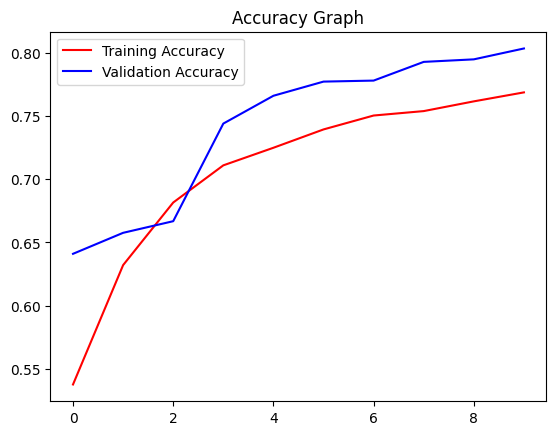

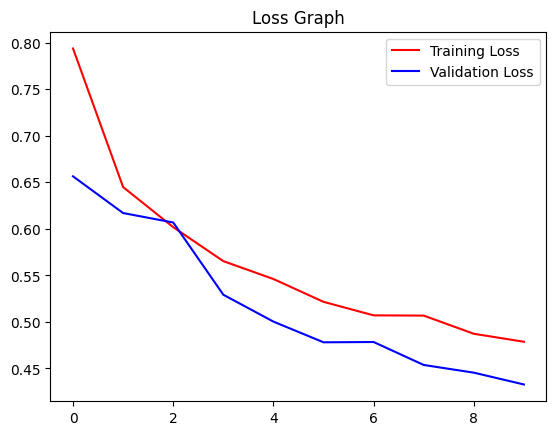

In [23]:
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
epochs=range(len(acc))
plt.plot(epochs,acc,'r',label='Training Accuracy')
plt.plot(epochs,val_acc,'b',label='Validation Accuracy')
plt.title('Accuracy Graph')
plt.legend()
plt.figure()

loss=history.history['loss']
val_loss=history.history['val_loss']
plt.plot(epochs,loss,'r',label='Training Loss')
plt.plot(epochs,val_loss,'b',label='Validation Loss')
plt.title('Loss Graph')
plt.legend()
plt.show()

In [24]:
print("Final training accuracy:", history.history['accuracy'][-1])
print("Final validation accuracy:", history.history['val_accuracy'][-1])

Final training accuracy: 0.7686768770217896
Final validation accuracy: 0.8033999800682068


In [25]:
import cv2

In [28]:
test_image=cv2.imread('/content/cat.jpg')

In [30]:
test_image = cv2.cvtColor(test_image, cv2.COLOR_BGR2RGB)

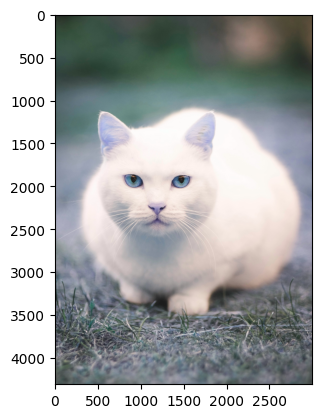

In [31]:
plt.imshow(test_image)

In [32]:
test_image.shape

(4307, 3000, 3)

In [33]:
test_image=cv2.resize(test_image,(128,128))

In [34]:
test_input=test_image.reshape((1,128,128,3))

In [35]:
test_input = test_input / 255.0

In [36]:
model.predict(test_input)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 579ms/step


array([[0.49159083]], dtype=float32)

In [61]:
def predict_label(model,image_path):
  import cv2
  img=cv2.imread(image_path)
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  img = cv2.resize(img, (128, 128))
  img = img.reshape((1, 128, 128, 3)).astype('float32') / 255.0
  pred = model.predict(img)
  if pred < 0.53:
    return f"Cat({pred})"
  else:
    return f"Dog({pred})"


In [62]:
print(predict_label(model, '/content/Img.jpg'))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Cat([[0.49062923]])


In [39]:
df.head(5)


,images,label
0,PetImages/Cat/5399.jpg,0
1,PetImages/Dog/10554.jpg,1
2,PetImages/Dog/3109.jpg,1
3,PetImages/Cat/6994.jpg,0
4,PetImages/Dog/7240.jpg,1


In [40]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [44]:
model.save('/content/drive/MyDrive/cat_dog_model.keras')


In [45]:
import tensorflow as tf
from google.colab import drive

# Step 1: Mount Google Drive
drive.mount('/content/drive')


# Step 3: Convert to TFLite
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Step 4: Save the converted model to Drive
tflite_path = "/content/drive/MyDrive/cat_dog_model.tflite"
with open(tflite_path, "wb") as f:
    f.write(tflite_model)

print(f"✅ TFLite model saved to: {tflite_path}")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Saved artifact at '/tmp/tmpejun6pty'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name='keras_tensor')
Output Type:
  TensorSpec(shape=(None, 1), dtype=tf.float32, name=None)
Captures:
  138321543110992: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138321543108112: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138321543109072: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138321543109456: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138321543110032: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138321543113104: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138321543114448: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138321543113872: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138321543115216: TensorSp